<a href="https://colab.research.google.com/github/RomGor1/Final-test-assignment-for-students-with-debt/blob/main/Machine_learning_methodsD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                  OLS Regression Results                                                 
Dep. Variable:     Сброс загрязненных сточных вод недостаточно очищенных, млн м3   R-squared:                       0.589
Model:                                                                       OLS   Adj. R-squared:                  0.582
Method:                                                            Least Squares   F-statistic:                     96.98
Date:                                                           Sat, 05 Apr 2025   Prob (F-statistic):           3.25e-63
Time:                                                                   02:19:44   Log-Likelihood:                -1923.7
No. Observations:                                                            345   AIC:                             3859.
Df Residuals:                                                                339   BIC:                             3883.
Df Model:               

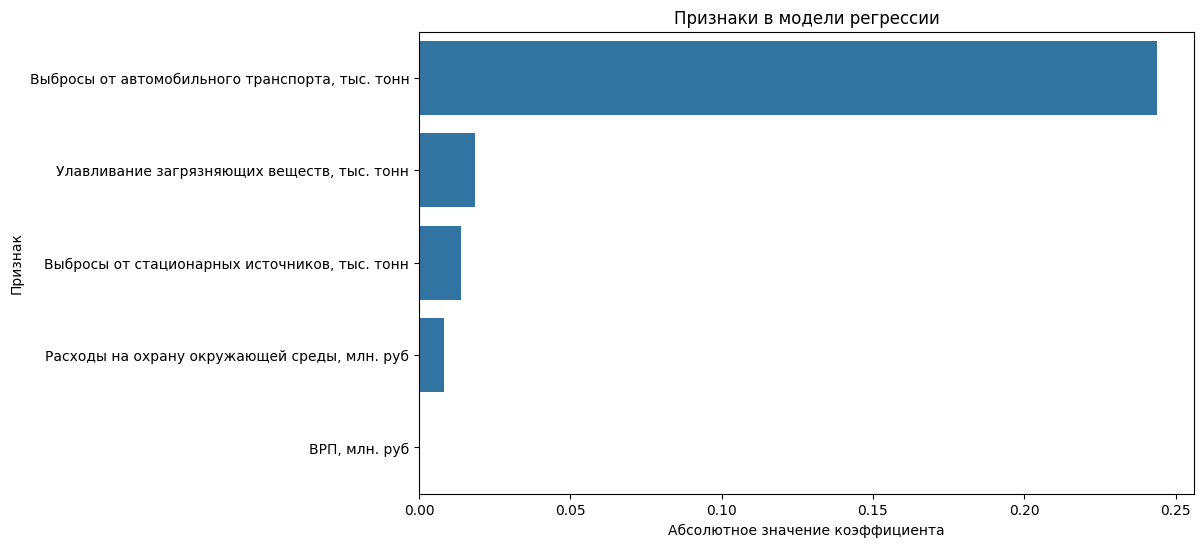

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файла
data = pd.read_excel('Экология.xlsx')

# Зависимая переменная - объем загрязненных сточных вод (столбец N)
# Независимые переменные: ВРП (F), расходы на охрану окруж. среды (G),
# выбросы от автотранспорта (H), выбросы от стационарных источников (I),
# улавливание загрязняющих веществ (K)

X = data[['ВРП, млн. руб', 'Расходы на охрану окружающей среды, млн. руб',
          'Выбросы от автомобильного транспорта, тыс. тонн',
          'Выбросы от стационарных источников, тыс. тонн',
          'Улавливание загрязняющих веществ, тыс. тонн']]
y = data['Сброс загрязненных сточных вод недостаточно очищенных, млн м3']

# Добавляем константу для intercept
X = sm.add_constant(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели
model = sm.OLS(y_train, X_train).fit()

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(model.summary())
print(f"\nMSE на тестовой выборке: {mse}")
print(f"R² на тестовой выборке: {r2}")

# Визуализация признаков в модели
coefs = pd.DataFrame({
    'Feature': X.columns[1:],
    'Coefficient': model.params[1:],
    'Absolute_Coefficient': np.abs(model.params[1:])
}).sort_values('Absolute_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=coefs)
plt.title('Признаки в модели регрессии')
plt.xlabel('Абсолютное значение коэффициента')
plt.ylabel('Признак')
plt.show()

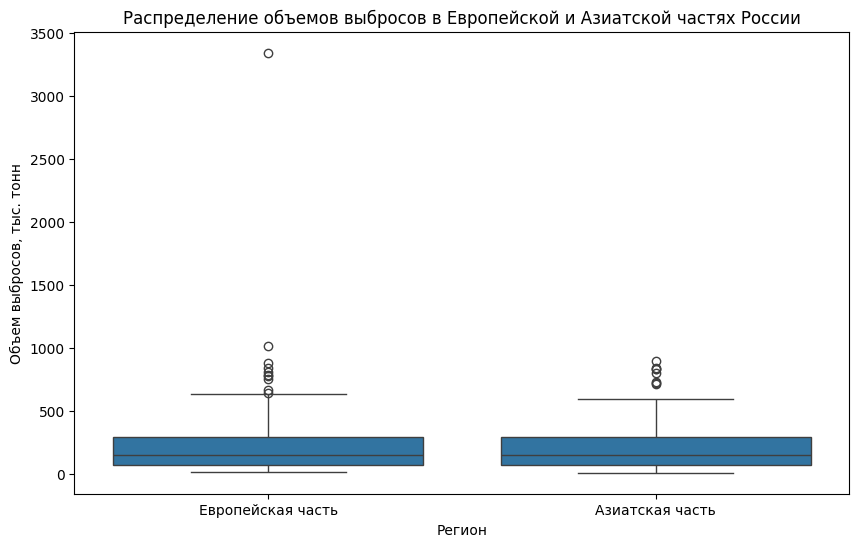

Результаты t-теста:
 t-статистика = -0.163, p-value = 0.87092


In [ ]:
from scipy.stats import ttest_ind

# Разделим регионы на европейские и азиатские
# Европейская часть: Центральный, Северо-Западный, Южный, Северо-Кавказский, Приволжский федеральные округа
european_okrugs = ['Центральный федеральный округ', 'Северо-Западный федеральный округ',
                   'Южный федеральный округ', 'Северо-Кавказский федеральный округ',
                   'Приволжский федеральный округ']

european_data = data[data['Округ'].isin(european_okrugs)]
asian_data = data[~data['Округ'].isin(european_okrugs)]

# Сравним общий объем выбросов (автотранспорт + стационарные источники)
european_emissions = european_data['Выбросы от автомобильного транспорта, тыс. тонн'] + \
                     european_data['Выбросы от стационарных источников, тыс. тонн']

asian_emissions = asian_data['Выбросы от автомобильного транспорта, тыс. тонн'] + \
                  asian_data['Выбросы от стационарных источников, тыс. тонн']

# Проведем t-тест
t_stat, p_value = ttest_ind(european_emissions, asian_emissions, equal_var=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(x=['Европейская часть']*len(european_emissions) + ['Азиатская часть']*len(asian_emissions),
            y=np.concatenate([european_emissions, asian_emissions]))
plt.title('Распределение объемов выбросов в Европейской и Азиатской частях России')
plt.ylabel('Объем выбросов, тыс. тонн')
plt.xlabel('Регион')
plt.show()

print(f"Результаты t-теста:\n t-статистика = {t_stat:.3f}, p-value = {p_value:.5f}")